The field of genomics has seen massive growth in the past few years because of advancements in sequencing technologies that have pushed genomic data in the wave of big data. ML techniques, with their ability to analyze large-scale data, can turn this complex genomic data into biological insights that can in turn convert into useful products. ML algorithms have been widely used in biology and genomics to apply to complex multi-dimensional datasets for the building of predictive models to solve complex biological problems such as disorder risk prediction, mental illness prediction, diagnosis, treatment, and so on. This chapter introduces the main ML algorithms and libraries that are commonly used in genomic data analysis. By the end of the chapter, you will know what supervised and unsupervised ML methods are, understand the most common ML algorithms and libraries for genomics, and know when and how to use them. You will know how to build a predictive model using genomics data and be aware of the challenges encountered by ML algorithms for genomics and potential solutions for addressing the same.

For example, a lot of effort has been put into the generation of deep datasets such as The Cancer Genome Atlas (TCGA, 2014), the Encyclopedia of DNA Elements (ENCODE, 2012), GenBank from the National Center for Biotechnology Information (NCBI, 1988), and so on.

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781804615447/files/image/B18958_03_001.jpg)

### Thanks to rapid advancements in NGS, genomics has shown tremendous growth in the last decade, which has led to an outpouring of massive sequence data. In addition to whole-genome sequencing (WGS), other promising techniques have emerged, such as whole-exome sequencing (WES) to measure the expressed region of the genome, whole-transcriptome sequencing (WTS) or RNA-sequencing (RNA-seq) to measure mRNA expression, ChIP-sequencing (ChIP-seq) to identify transcription-factor binding sites, and Ribo-sequencing (Ribo-seq) to identify actively translating mRNAs for quantifying relative protein abundance, and so on. The challenge now is not “what to measure ” but “how to analyze the data to extract meaningful data and turn those insights into applications”. While the development of NGS technologies and the generation of massive data has provided opportunities for a new field called “bioinformatics” to grow significantly, it has also opened the door for the application of ML techniques with the goal of mining these large-scale biological genomic datasets.

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781804615447/files/image/B18958_03_003.jpg)

Feature extraction and selection
Feature extraction and selection are considered the most important steps in ML as the performance of the model mainly depends on the features that you extract and include in the model training. Feature extraction, as the name suggests, is a process of creating features or attributes from datasets. It is the transformation of processed data into tabular data to represent a feature vector. The features can be numerical, categorical, ordinal, and so on. With feature selection, you select only relevant features that best fit the model based on statistical or hypothesis testing.

One of the popular use cases for genomics is outcome prediction. In this particular use case, we will try to predict if a patient has lung cancer or not based on gene expression. Before we start building the model and using that to make a prediction, let’s try to understand how a typical ML disease prediction model work in this use case. It works by mapping the relationships between individual patients’ sample gene expression values (features) and the target variable (Normal versus Tumor)—in other words, mapping the pattern of the features within the expression data to the target variable. In this example, we will use a supervised ML method to build a classification model from the expression data to predict the outcome. Each row of the data represents a patient sample that consists of gene expressions. We will use logistic regression to build a simple binary classification model for outcome prediction.

We will start our illustration of ML on a genomics problem using a real dataset from BARRA:CuRDa, a curated RNA-seq database for cancer research (https://sbcb.inf.ufrgs.br/barracurda). RNA-seq is one of the most important methods for inferring global gene expression levels in biological samples.

In [1]:
import pandas as pd

In [3]:
lung1 = pd.read_csv('../Chapter03/lung/GSE87340.csv.zip')

In [4]:
lung2 = pd.read_csv('../Chapter03/lung/GSE60052.csv.zip')

In [5]:
lung3 = pd.read_csv('../Chapter03/lung/GSE87340.csv.zip')

In [6]:
df_lung = pd.concat([lung1, lung2, lung3])

In [7]:
df_lung.head()

,ID,class,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,...,ENSG00000285985,ENSG00000285986,ENSG00000285987,ENSG00000285988,ENSG00000285989,ENSG00000285990,ENSG00000285991,ENSG00000285992,ENSG00000285993,ENSG00000285994
0,SRR4296063,Normal,10.728260,4.668142,10.278195,10.184036,8.215333,11.310861,13.178872,11.469473,...,2.329988,2.329988,2.329988,2.329988,2.329988,2.329988,4.877783,2.329988,2.916440,3.332160
1,SRR4296064,Tumor,11.332606,2.329988,10.127734,10.167900,8.174060,10.399611,13.208972,11.510862,...,2.329988,2.329988,2.931826,2.329988,2.329988,3.375017,4.644066,2.329988,2.329988,3.509185
2,SRR4296065,Normal,9.951182,4.264426,10.288874,10.093258,8.011385,11.814572,14.038661,11.651766,...,2.329988,2.329988,2.931948,2.329988,2.329988,2.329988,5.169625,2.932519,2.329988,3.640437
3,SRR4296066,Tumor,12.185680,2.798643,10.178582,10.401606,8.902321,10.294009,13.170466,11.546855,...,2.329988,2.329988,3.397771,2.329988,2.329988,2.874488,4.548259,2.329988,2.329988,3.720906
4,SRR4296067,Normal,9.875179,2.922071,10.444479,10.435843,8.692961,12.604934,13.538341,11.733252,...,2.329988,2.329988,2.329988,2.329988,2.329988,2.329988,4.055185,2.329988,3.015702,4.348411


###  The ID indicates the SRA ID from where the sample is coming from, the class here indicates whether the sample is classified as normal or a tumor, and the rest of the columns represent the gene expression values of the sample.

In [9]:
df_lung.isna().sum().sum()

0

### The first step around any data-related analysis is to start by doing EDA. This can be done by looking at the distributions of the data itself. Since EDA is quite crucial for ML, we will try to visualize the data to understand the data structure in general.

In [13]:
df = df_lung['class'].value_counts().reset_index()

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='class', ylabel='index'>

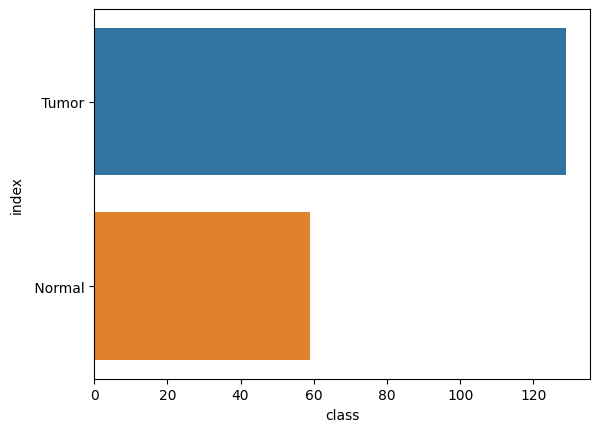

In [14]:
sns.barplot(x= 'class', y = 'index', data = df)